In [27]:
import time
import sys
import matplotlib.pyplot as plt
import numpy as np

initial_x = 0.01
initial_y = 0.01
while(True):
    initial_x = np.random.uniform(low=0, high=1)
    initial_y = np.random.uniform(low=0, high=1)
    if domain(initial_x, initial_y):
        break

learning_rate = 0.0003

In [28]:
func = lambda x, y : -np.log(1 - x - y) - np.log(x) - np.log(y)
domain = lambda x, y: ((x + y) < 1) and (x > 0) and (y > 0)

df_dx = lambda x, y: 1/(1 - x - y) - (1/x)
df_dy = lambda x, y: 1/(1 - x - y) - (1/y)

d2f_d2x = lambda x, y: 1/((1- x - y)**2) + 1/(x**2)
d2f_dxdy = lambda x, y: 1/((1- x - y)**2)
d2f_d2y = lambda x, y: 1/((1- x - y)**2) + 1/(y**2)

In [29]:
def scatter_plot(x_values, y_values, x_label, y_label, title):
    """
    Plot Misclassifications vs Epoch
    """
    plt.figure(figsize=(11,6))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_values, y_values)
    plt.show()

In [30]:
print("Simple Gradient Descent Method:\n")
weights = np.array([initial_x,initial_y])
print(f"Initial Weights: {weights}")

energies = []
weights_x = []
weights_y = []

energies.append(func(weights[0],weights[1]))
weights_x.append(weights[0])
weights_y.append(weights[1])

epoch = 0
start = time.time()

while(True):
    epoch += 1
    gradient = np.array([df_dx(weights[0], weights[1]), df_dy(weights[0], weights[1])])
    weights = weights - (learning_rate * gradient)
    
    try:
        energy = func(weights[0],weights[1])
    except ValueError:
        print("The points fall out of the domain and the global minima is not yet reached. Please try with different initial weights or learning rate")
        break
        
    if not domain(weights[0], weights[1]):
        print("The points fall out of the domain and the global minima is not yet reached. Please try with different initial weights or learning rate")
        sys.exit()
        
    if energy >= energies[-1]:
        break
    else:
        energies.append(energy)
        weights_x.append(weights[0])
        weights_y.append(weights[1])
    
end = time.time()
print(f"Time taken to Converge : {end-start}")
print(f"Initial Energy: {energies[0]}")
print(f"Final Energy: {energies[-1]}")
print(f"Number of epochs: {epoch}")
print(f"Final Weights: {[weights_x[-1], weights_y[-1]]}")

Simple Gradient Descent Method:

Initial Weights: [0.01 0.01]
Time taken to Converge : 0.01995992660522461
Initial Energy: 9.230543079293701
Final Energy: 3.295836866004371
Number of epochs: 1960
Final Weights: [0.3333332939208274, 0.3333332939208274]


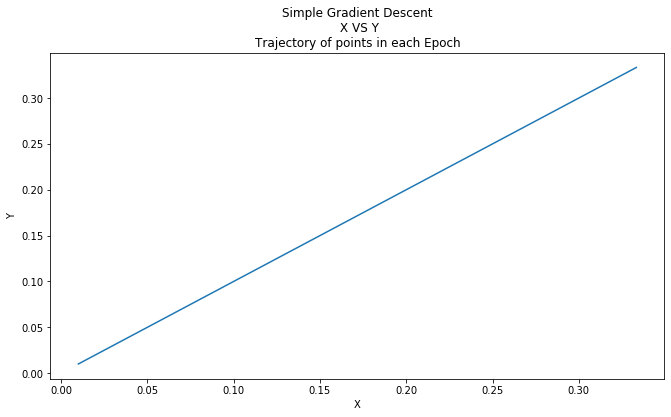

In [31]:
scatter_plot(weights_x, weights_y, "X", "Y", "Simple Gradient Descent\n X VS Y\nTrajectory of points in each Epoch")

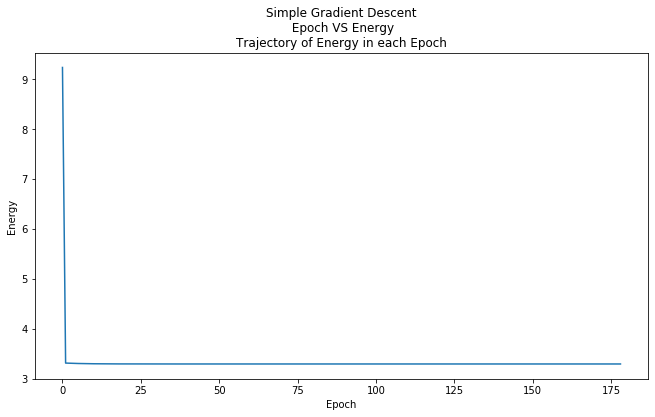

In [288]:
scatter_plot(range(len(energies)), energies, "Epoch", "Energy", "Simple Gradient Descent\n Epoch VS Energy\nTrajectory of Energy in each Epoch")

In [289]:
print("Newton Method:\n")
weights = np.array([initial_x,initial_y])
print(f"Initial Weights: {weights}")

energies = []
weights_x = []
weights_y = []

energies.append(func(weights[0],weights[1]))
weights_x.append(weights[0])
weights_y.append(weights[1])

epoch = 0
start = time.time()

while(True):
    epoch +=1
    gradient = np.array([df_dx(weights[0], weights[1]), df_dy(weights[0], weights[1])])
    
    hessian_1 = d2f_d2x(weights[0],weights[1])
    hessian_2 = hessian_3 = d2f_dxdy(weights[0],weights[1])
    hessian_4 = d2f_d2y(weights[0],weights[1])
    
    hessian = np.array([[hessian_1, hessian_2],[hessian_3, hessian_4]])
    hessian_inverse = np.linalg.inv(hessian)
    weights = weights - (learning_rate * np.dot(hessian_inverse, gradient))
    try:
        energy = func(weights[0],weights[1])
    except ValueError:
        print("The points fall out of the domain and the global minima is not yet reached. Please try with different initial weights or learning rate")
        break
        
    if not domain(weights[0], weights[1]):
        print("The points fall out of the domain and the global minima is not yet reached. Please try with different initial weights or learning rate")
        sys.exit()
        
    if energy >= energies[-1]:
        break
    else:
        energies.append(energy)
        weights_x.append(weights[0])
        weights_y.append(weights[1])

end = time.time()
print(f"Time taken to Converge : {end-start}")
print(f"Initial Energy: {energies[0]}")
print(f"Final Energy: {energies[-1]}")
print(f"Number of epochs: {epoch}")
print(f"Final Weights: {[weight_x[-1], weights_y[-1]]}")

Newton Method:

Initial Weights: [0.01 0.01]
Time taken to Converge : 0.15832972526550293
Initial Energy: 9.230543079293701
Final Energy: 3.2958368660044837
Number of epochs: 5893
Final Weights: [0.3333333128558252, 0.3333332574904622]


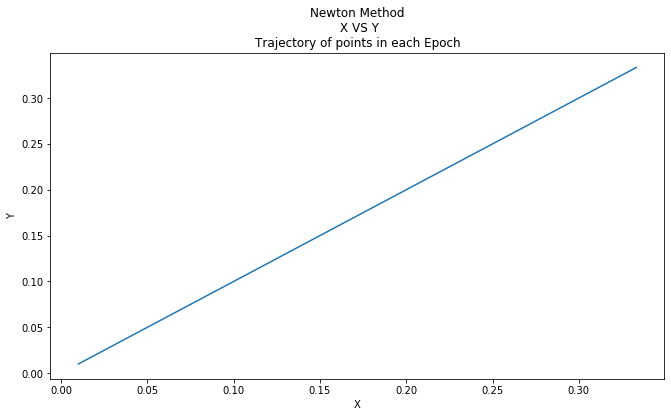

In [290]:
scatter_plot(weights_x, weights_y, "X", "Y", "Newton Method\n X VS Y\nTrajectory of points in each Epoch")

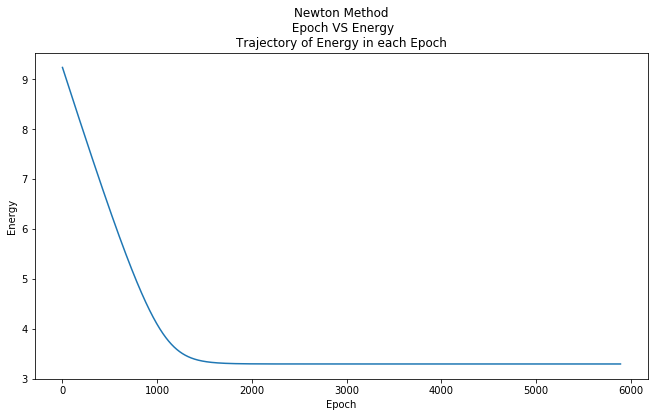

In [291]:
scatter_plot(range(len(energies)), energies, "Epoch", "Energy", "Newton Method\n Epoch VS Energy\nTrajectory of Energy in each Epoch")

### The Simple gradient descent method converged in 179 epochs whereas the Newton method converged in 5893 epochs. Though theoritically the Newton method has to converge faster than the Gradient descent method, the chosen learning rate (0.003) is probably favoring the Gradient descent method to converge faster. 